<span style="color:#0808D6"><center> <h1> <font size="5"> DATA3406 Mini-Assignment 08 - 480377616  </font> </h1></center></span> 

<center> Group 4 - COVID 19 Analysis </center>

***
<div style="background-color:#054afa;">
<span style="color:#ffb908"><center> <h1> Part 1 of Mini-Assignment </h1></center></span> 

<div style="background-color:#EFEEDF;">
<span style="color:maroon"><center> <h1> 1. Analysis towards the Driving Question </h1></center></span> 

## 1.1 What is the Driving Question?

According to the Week 07 Lecture slides, the Driving Question for the COVID-19 dataset is:


<center><b>How deadly is COVID-19?</b></center>

We have been asked how we can present data about this question so that the uncertainty is made very clear to the viewers of any plots/graphics we might use.

## 1.2 Recap: Analysis from Mini-Assingnment 07

Near the end of Mini-Assignment 07, I concluded with some brief analysis of the death rate (per million) in Germany, China and Australia. I will start off by reproducing the graph seen from last week and then extending our analysis from there.

However, we first need to load our libraries and appropriate datasets first.

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
import plotly.express as px
warnings.filterwarnings("ignore")
#Reading .CSV file
df = pd.read_csv("owid-covid-data.csv")
#Removing rows with NaN for iso_code or continent
df_clean = df[df['iso_code'].notna()]
df_clean = df_clean[df_clean['continent'].notna()]

#Filtering for Germany
df_germany = df_clean[df['location'].str.contains("Germany")]
df_germany.head()

#Filtering for Australia
df_aus = df_clean[df['location'].str.contains("Australia")]

#Filtering for China
df_china = df_clean[df['location'].str.contains("China")]

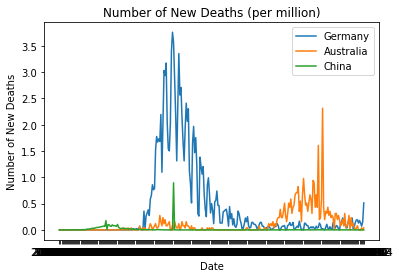

In [2]:
plt.plot(df_germany['date'], df_germany['new_deaths_per_million'], label="Germany")
plt.plot(df_aus['date'], df_aus['new_deaths_per_million'], label="Australia")
plt.plot(df_china['date'], df_china['new_deaths_per_million'], label="China")
plt.plot()

plt.xlabel("Date")
plt.ylabel("Number of New Deaths")
plt.title("Number of New Deaths (per million)")
plt.legend()
plt.show()

As I stated in my analysis from last week, it seems that after the first wave of cases, Germany seemed to manage their death rate relatively well compared to Australia, who had struggled to lower and maintain their death rate upon the second wave that particularly inflicted the state of Victoria.

Considering the almost uncontrollable spread and difficulty in managing COVID-19 symptoms, I became curious to see **how the death rate of COVID-19 was compared to cardiovascular disease (CVD)**. Is COVID-19 as bad as CVD?

I was interested to see how deadly COVID-19 was compared to cardiovascular disease since according to the World Health Organisation (WHO), CVD is the **number one leading cause of death in the world, taking millions of lives each year and claiming the life of one person approximately every 13 minutes**.

## 1.3 Comparing "deadliness" of COVID-19 compared to CVD

If we inspect our DataFrame, we notice some columns that can help us achieve this analysis. These columns include:

- `total_cases_per_million` : total deaths attributed to COVID-19 per 1,000,000 people
- `cardiovasc_death_rate`: Death rate from cardiovascular disease in 2017 (annual number of deaths per 100,000 people)

It's important to note that we need to account for differences in time and density. For example, the rise of COVID-19 has been around for less than a year and so we cannot get annual number of deaths unlike CVD in 2017.

Hence, we first must do some data cleaning and manipulation before proceeding with the analysis.

### 1.3.1 Collecting the latest recorded date of cases in the CSV file

COVID-19 is a rapidly evolving situation, and so we must first find the last date of recordings and find the number of days it has been since the first date of recording, so that we account for the fact that the CVD column was based on annual numbers.

In [3]:
#Finding earliest day of cases recorded and latest day of cases recorded
min_date = df_clean["date"].min()
max_date = df_clean["date"].max()
print(min_date, max_date, type(min_date))

2019-12-31 2020-10-14 <class 'str'>


As seen from above, the COVID-19 date recordings have been around for approximately 10 months. Also note that the data is in a `string` class and so we need to convert it to a `DateTime` object to do calculations.

In [4]:
#Converting the dates to a DateTime object

min_date_obj = datetime.strptime(min_date, '%Y-%m-%d')
max_date_obj = datetime.strptime(max_date, '%Y-%m-%d')

#Calculating the number of days between first and last recording
print(max_date_obj - min_date_obj)

288 days, 0:00:00


As seen, there have been 288 days since the first recording of COVID-19 data and last recording of COVID-19 data.

### 1.3.2 Adjusting the Number of Deaths from CVD

Since the `cardiovasc_death_rate` column measures the **annual** number of deaths per 100,000 people, we will need to approximate the number of deaths per 100,000 people for 288 days in 2017, in order to more appropriately compare it with the date rate from COVID-19.

This will be done by multiplying the values form the `cardiovasc_death_rate` by 288/365

In [5]:
#Adding column that approximates number of deaths per 100K people for 288 days
df_clean["cvd_288"] = df_clean["cardiovasc_death_rate"]*(288/365)

#Checking that the calculation worked and is appropriate

df_clean[["location","cardiovasc_death_rate","cvd_288"]].tail()

,location,cardiovasc_death_rate,cvd_288
49507,Zimbabwe,307.846,242.903145
49508,Zimbabwe,307.846,242.903145
49509,Zimbabwe,307.846,242.903145
49510,Zimbabwe,307.846,242.903145
49511,Zimbabwe,307.846,242.903145


### 1.3.3 Calculating the Number of Deaths per 100,000 people from COVID-19

Now that we have calculated the number of deaths per *100,000* people in 288 days (2017) for CVD, we will now do the same for COVID-19.

However, the column `total_deaths_per_million` lists the total deaths attributed to COVID-19 per *1,000,000* people.

Hence, we will collect the lastest (i.e. 'max') `total_deaths_per_million` value from each country (so that we measure death number across 288 days) and then divide it by 10 so that we get the number of deaths per 100,000 people.

In [6]:
#Get the latest value of total number of deaths per million
covid_country = df_clean.groupby("location").max().reset_index()
#Divide the total deaths per million by 10
covid_country["total_deaths_100k"] = covid_country[["total_deaths_per_million"]]/10

#Checking that calculations are correct. We will use China as an example
final_df_analysis = covid_country[["location", "iso_code","total_deaths_per_million",
              "total_deaths_100k", "cvd_288"]]

final_df_analysis.tail()

,location,iso_code,total_deaths_per_million,total_deaths_100k,cvd_288
205,Vietnam,VNM,0.360,0.0360,193.681973
206,Western Sahara,ESH,1.674,0.1674,NaN
207,Yemen,YEM,20.016,2.0016,390.577710
208,Zambia,ZMB,18.766,1.8766,185.029348
209,Zimbabwe,ZWE,15.475,1.5475,242.903145


### 1.3.4 Removing Countries with NaN values for COVID-19 or CVD Data

Before comparing the CVD and COVID-19 death rates across countries, we will remove countries that have NaN values for either COVID-19 or CVD deaths. This is because it will be impossible to compare COVID-19 to CVD for countries that have missing values for at least one of these diseases.

In [7]:
final_df_analysis = final_df_analysis.dropna()

### 1.3.5 Creating New Column of Difference between CVD and COVID-19 Deaths

We predict that CVD will generally be more deadlier than COVID-19, given its long history of high mortality rates. But we are curious as to how the difference in CVD and COVID-19 spread across different countries.

As such, we will create a new column that calculates the number of COVID-19 deaths over the number of CVD deaths as a percentage.

In [8]:
final_df_analysis["covid_cvd_percent"] = (final_df_analysis["total_deaths_100k"]/final_df_analysis["cvd_288"])*100

final_df_analysis.tail()

,location,iso_code,total_deaths_per_million,total_deaths_100k,cvd_288,covid_cvd_percent
204,Venezuela,VEN,24.968,2.4968,161.635068,1.544714
205,Vietnam,VNM,0.360,0.0360,193.681973,0.018587
207,Yemen,YEM,20.016,2.0016,390.577710,0.512472
208,Zambia,ZMB,18.766,1.8766,185.029348,1.014217
209,Zimbabwe,ZWE,15.475,1.5475,242.903145,0.637085


### 1.3.6 Creating Heat Map of Percentage Difference Between COVID-19 Deaths and CVD Deaths

As seen from the glimpse in the above table, COVID-19 deaths are disproportionately lower than CVD deaths for some countries. This suggests that COVID-19 in most countries is not as deadly as CVD. However, perhaps some countries might show signs that COVID-19 is almost as deadly as CVD, and we will create a heat map to visualise this.

In [45]:
fig = px.choropleth(data_frame = final_df_analysis,
                    locations= "iso_code",
                    color= "covid_cvd_percent",
                    hover_name= "location",
                    color_continuous_scale= 'ylorbr',
                   title = "Heat Map of COVID-19 Deaths Compared to CVD",
                   labels = {
                       "covid_cvd_percent": "Number of COVID-19 Deaths Compared to CVD (%)"
                   })

fig.show()

As shown from the interactive choropleth above, COVID-19 death rates are much lower than CVD for many countries. In fact, it appears that for most countries, the total number of COVID-19 deaths are only around 0-20% of the total from CVD deaths.

The countries that do appear to show relatively high COVID-19 deaths compared to CVD include:

- Peru (COVID-19 Death Rate is higher than CVD Death Rate (150%))
- Belgium (COVID-19 Death Rate is almost the same as CVD Death Rate (97%))
- Spain (COVID-19 Death Rate is almost the same as CVD Death Rate (91%))

Besides the above three countries, it appears that CVD deaths are much higher than COVID-19, which possibly makes us think that **CVD is actually more deadly and prevalent than COVID-19 deaths**.

## 1.4 Analysis of Uncertainty

From the above findings, it does appear that COVID-19 is not as deadly as CVD. However, there is a lot of uncertainty surrounding the data provided to us. These include:

- Not all deaths from COVID-19 may be reported. CVD deaths may be better recorded as it is a well studied disease that many healthcare systems are adept to manage and report. As such, it is possible that the comparison of COVID-19 deaths to CVD deaths may be **under-represented**.



- We interpreted COVID-19 death rates to be the number of deaths since 31/12/2019 to 14/10/2020. Some countries may have not been affected by COVID-19 from 31/12/2019, meaning that the "288 day" death rate of COVID-19 may also be under-represented. Meanwhile, CVD affects almost every country to some extent and so the annual average for CVD is more accurate and certain.


- We found the "288 day" CVD deaths by multiplying the number of CVD deaths by 288/365. Indeed, while this seems simple and reasonable, there may be several confounding factors. For example, if most CVD deaths occur around the end of the year, then the "288 day" CVD deaths may be **over-represented**, leading to a possible inflation of CVD deaths reported.

Overall, it appears that **COVID-19 is not as deadly as CVD**, with the number of COVID-19 deaths disproportionately lower than the number of CVD deaths. However, there are some countries that do have an alarmingly high number of COVID-19 deaths compared to their number of CVD deaths, such as Peru and some countries in Europe. Further investigation into how these countries are managing COVID-19 needs to be warranted.

Furthermore, our results should be interpreted as cautionary due to the possible factors of uncertainty that may confound our findings.

## 1.5 Extra Analysis (Death Conversion)

Following from the analysis that compared COVID-19 deaths to CVD, I became curious as to how deadly COVID-19 is by itself (i.e. without comparison to CVD).

I decided to do this by calculating the "death conversion rate". That is, the number of cases in each country that eventually died.

For this analysis, I will use the following variables

- `total_cases`
- `total_deaths`

We will create another variable, named `death_conversion`, that is basically `total_deaths`/`total_cases` percentage for each day in each country, such that we get a rolling window of the death conversions.

In [62]:
#Creating new DataFrame with only the necessary variables
extra_analysis = df_clean[["location","iso_code", "date", "total_cases","total_deaths"]]

#Creating new column titled death_conversion that finds the rolling number of cases that became COVID-19 related deaths
extra_analysis["death_conversion"] = (extra_analysis["total_deaths"]/extra_analysis["total_cases"])*100
extra_analysis = extra_analysis[extra_analysis["date"] == "2020-10-14"]
extra_analysis.tail()

,location,iso_code,date,total_cases,total_deaths,death_conversion
48654,Kosovo,OWID_KOS,2020-10-14,16204.0,638.0,3.937299
48842,Yemen,YEM,2020-10-14,2056.0,597.0,29.036965
49093,South Africa,ZAF,2020-10-14,694537.0,18028.0,2.595686
49303,Zambia,ZMB,2020-10-14,15587.0,345.0,2.213383
49511,Zimbabwe,ZWE,2020-10-14,8036.0,230.0,2.862120


Now that we have calculated our `death_conversion`, we will now inspect the changes in COVID-19 death conversion as of 14/10/2020

In [70]:
fig_1 = px.choropleth(data_frame = extra_analysis,
                    locations= "iso_code",
                    color= "death_conversion", 
                    hover_name= "location",
                    color_continuous_scale= 'ylorbr',
                      title = "COVID-19 Cases that Became Deaths",
                     labels = {
                       "death_conversion": "Death Conversion (%)"})

fig_1.show()

As seen from the interactive plot above, most countries have a death conversion that is around 5%. Some of the more extreme countries include Yemen and Mexico, with death converisons of 29% and 10% respectively. 

As such, this seems to provide evidence that for most countries, COVID-19 is not as deadly compared to other diseases with a higher mortality rate (e.g. Marburg virus or ebola).

Nevertheless, there are sources of uncertainty, such as knowing whether deaths were due to COVID-19, or whether some deaths from COVID-19 were unreported (e.g. a person died from COVID-19 but it was not reported as COVID-19 death as the person was not tested).

***
<div style="background-color:#054afa;">
<span style="color:#ffb908"><center> <h1> Part 2 of Mini-Assignment </h1></center></span> 

As stated back in Section 1 the things I have learnt from my exploration that could help the driving question of **"How Deadly is COVID-19"** include:

- COVID-19 does not appear to be as deadly compared to other more prominent diseases that have chronically affected the world, such as CVD.


- When accounted for time span of the data collected and population for each country, COVID-19 deaths are disproportionately lower than the number of deaths due to CVD. 


- While most countries have significantly greater numbers of CVD deaths compared to COVID-19 deaths, there are some countries that have a concerning number of COVID-19 deaths compared to CVD. These countries include Peru and some European countries (Belgium, Spain), with the COVID-19 deaths etiher very close, or even surpassing the number of CVD deaths. Perhaps further investigation into the healthcare sector of these countries is warranted.


- There could be many sources of uncertainty that makes us question the validity of our findings. For example, COVID-19 death rate may be under-represented, since the COVID-19 outbreak did not equally affect every country at the same time (whereas CVD is chronically present in almost every country).

- In terms of death conversion, COVID-19 appears to have a relatively low death conversion rate compared to other infectious diseases, with roughly 5% of cases for each country dying from COVID-19. Perhaps the reason why COVID-19 is widely presented on the media is due to its high infection rate, rather than mortality rate, which is not as high.

As such, our findings can help the driving question of how deadly COVID-19 is. Our results suggest that it is not as deadly as it seems, although there are many factors of uncertainty to be aware of, as mentioned previously.

<span style="color:#0808D6"><center> <h1> <font size="5"> End of Notebook  </font> </h1></center></span> 
***